[-2.  0.  0.  0.]
x= [-2.         -2.         -1.9988     ... -0.06422766 -0.07617222
 -0.08805436]
y= [0. 0. 0. ... 0. 0. 0.]
vx [ 0.          0.12        0.23976    ... -1.19445619 -1.18821362
 -1.18126686]
len(x) 1998
len(t) 2000


<IPython.core.display.Javascript object>


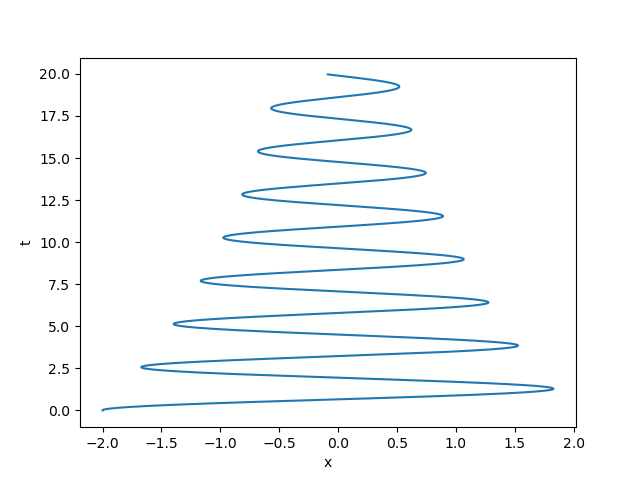

<IPython.core.display.Javascript object>


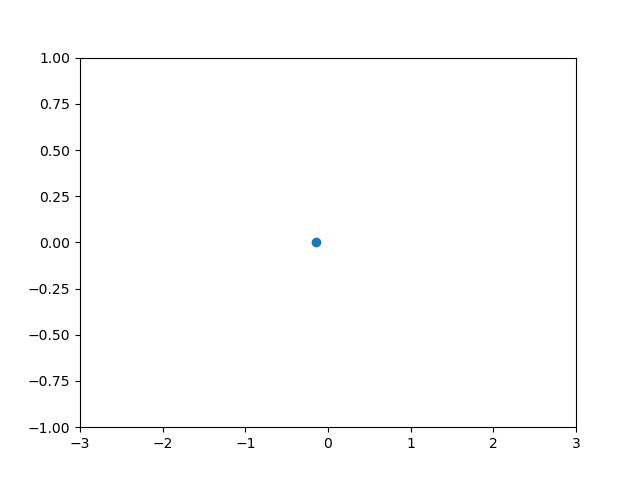

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

%matplotlib notebook

def yprime(state,t,k):
   m=0.500
   k=3.00   # spring stiffness (spring constant)
   b=0.100  # dumping
   n=len(state)
   yp=np.zeros(n)
   yp[0]=state[2]       # vx, i.e. dx/dt
   yp[1]=state[3]       # vy, i.e. dy/dt
   yp[2]=-(k/m)*state[0]-(b/m)*state[2]    # ax, i.e. dvx/dt
   yp[3]=0.0  # ay, i.e. dvy/dt 
   return yp

def Euler(y0,t,kconstant):
   n=len(t)
   m=len(y0)
   ytemp=np.zeros((n,m),dtype=float)   # n row, m column
   ytemp[0,:]=y0   # copy the initial value to the first row.

   i=0
   while i < (n-2):
      tx=t[i]
      dt=t[i+1]-t[i]
      yp=yprime(ytemp[i,:],tx,kconstant)
      ytemp[i+1,0]=ytemp[i,0]+yp[0]*dt     # update x
      ytemp[i+1,1]=ytemp[i,1]+yp[1]*dt     # update y
      ytemp[i+1,2]=ytemp[i,2]+yp[2]*dt     # update vx
      ytemp[i+1,3]=ytemp[i,3]+yp[3]*dt     # update vy
      i=i+1

   yval=ytemp[0:i,:]
   return yval


#  my program starts here...
dt = 0.01
tmax = 20.0
t  = np.arange(0.0,tmax,dt)

# set initial state in 1D array...
stateInit=np.zeros(4)
stateInit[0]=-2.0    #  x
stateInit[1]=0.0    #  y
stateInit[2]=0.0    # vx
stateInit[3]=0.0    # vy
print(stateInit)

kconstant=0.01   #  not used
stateA=Euler(stateInit,t,kconstant)

x=stateA[:,0]  # copy 1st column (x-points)
y=stateA[:,1]  # copy 2nd column (y-points)

vx=stateA[:,2]  # vx
print("x=",x)
print("y=",y)
print("vx",vx)
print("len(x)",len(x))
print("len(t)",len(t))

# check x vs time
t2=t[:len(x)]  # copy 198 x
plt.plot(x,t2)
plt.xlabel("x")
plt.ylabel("t")
plt.show()



# ========================================
#   additional code for annimation
# ========================================
xpoints=x[0::2]   # copy every 40 x points for annimation
ypoints=y[0::2]   # copy every 40 y points for annimation

fig=plt.figure()
ax=fig.add_subplot(111,autoscale_on=False, xlim=(-3.0,3.0), ylim=(-1.0,1.0))
#    defeint line type
line, = ax.plot([], [], 'o', lw=2)

def init():
   line.set_data([],[])
   return line

def animate(i):
   thisx=xpoints[i]
   thisy=ypoints[i]
   line.set_data(thisx,thisy)
   return line

ani=animation.FuncAnimation(fig,animate,np.arange(1,len(xpoints)),
            interval=20, blit=False, init_func=init)


plt.show()
 